## SMA Project 6 (Final Report)
## The aim of this project is to analyze the social behavior in a blog network and identify communities and influencers.
### Project Tasks:
          - Load social graph
          - Run community detection and centrality methods
          - Visualize the network
### Prepared by Mili Biswas & Muhamet Shehu

## In our project we have implemented below -

        - Girvan-Newman clustering algorithm till 15th iteration level
        - degree centrality
        - Random walk algorithm.
        - A procedure to normalize the degree centrality

## Based on the above implementation, we have performed the following tasks:
        - Use Girvan-Newman algorithm to find clusters of authors
        - Identify the top 10 users with highest degree centrality
        - Distribute two messages across the network using the random walk algorithm. Start each walk from the highest degree centrality user. Terminate the walk           when at least 200 nodes have been traversed.

## Visualization
    - Visualize the output of Girvan-Newman algorithm by coloring nodes according to their assigned groups.
    - Visualize the network and highlight the top 10 authors with highest degree centrality.
    
   
   ## *We are visualizing top 10 authors based on highest degree centrality, communities achieved by applying Girvan-Newman, shows Random Walk 1 and Random Walk 2        with 200 hops*


## ---------------   Project Code -----------------

                    Program output                    
Top 10 users with highest degree centrality
Node : 35 and degree is : 444
Node : 32 and degree is : 285
Node : 94 and degree is : 276
Node : 33 and degree is : 268
Node : 135 and degree is : 243
Node : 58 and degree is : 241
Node : 1140 and degree is : 238
Node : 91 and degree is : 233
Node : 113 and degree is : 224
Node : 194 and degree is : 214
Top 10 users with highest Normalized degree centrality
Node : 35 and normalized degree is : 1.0
Node : 32 and normalized degree is : 0.6418918918918919
Node : 94 and normalized degree is : 0.6216216216216216
Node : 33 and normalized degree is : 0.6036036036036037
Node : 135 and normalized degree is : 0.5472972972972973
Node : 58 and normalized degree is : 0.5427927927927928
Node : 1140 and normalized degree is : 0.536036036036036
Node : 91 and normalized degree is : 0.5247747747747747
Node : 113 and normalized degree is : 0.5045045045045045
Node : 194 and normalized degree is : 0.481981981

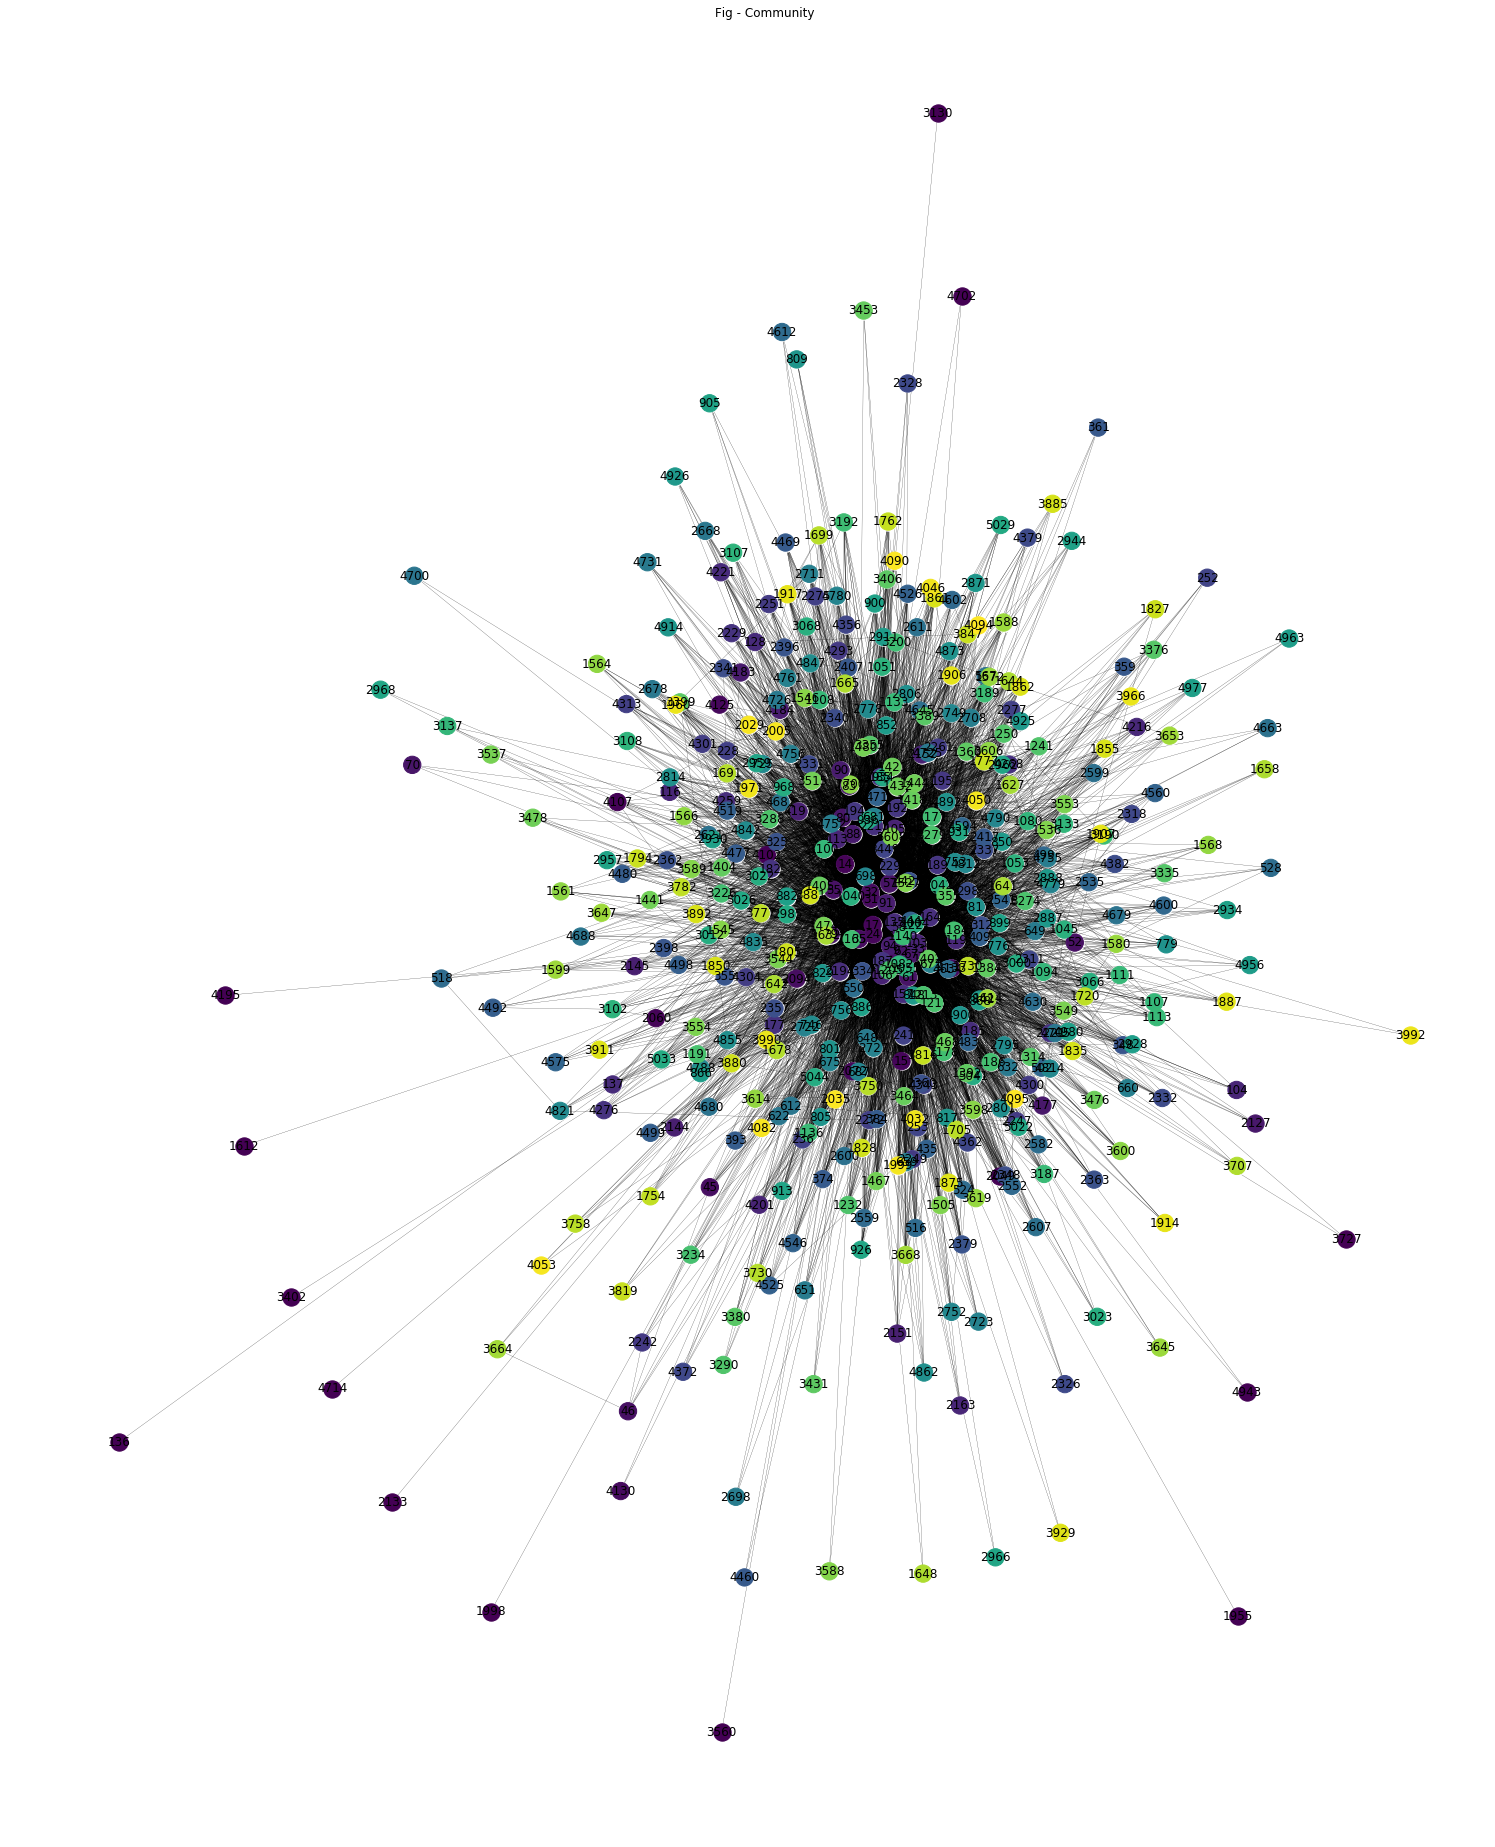

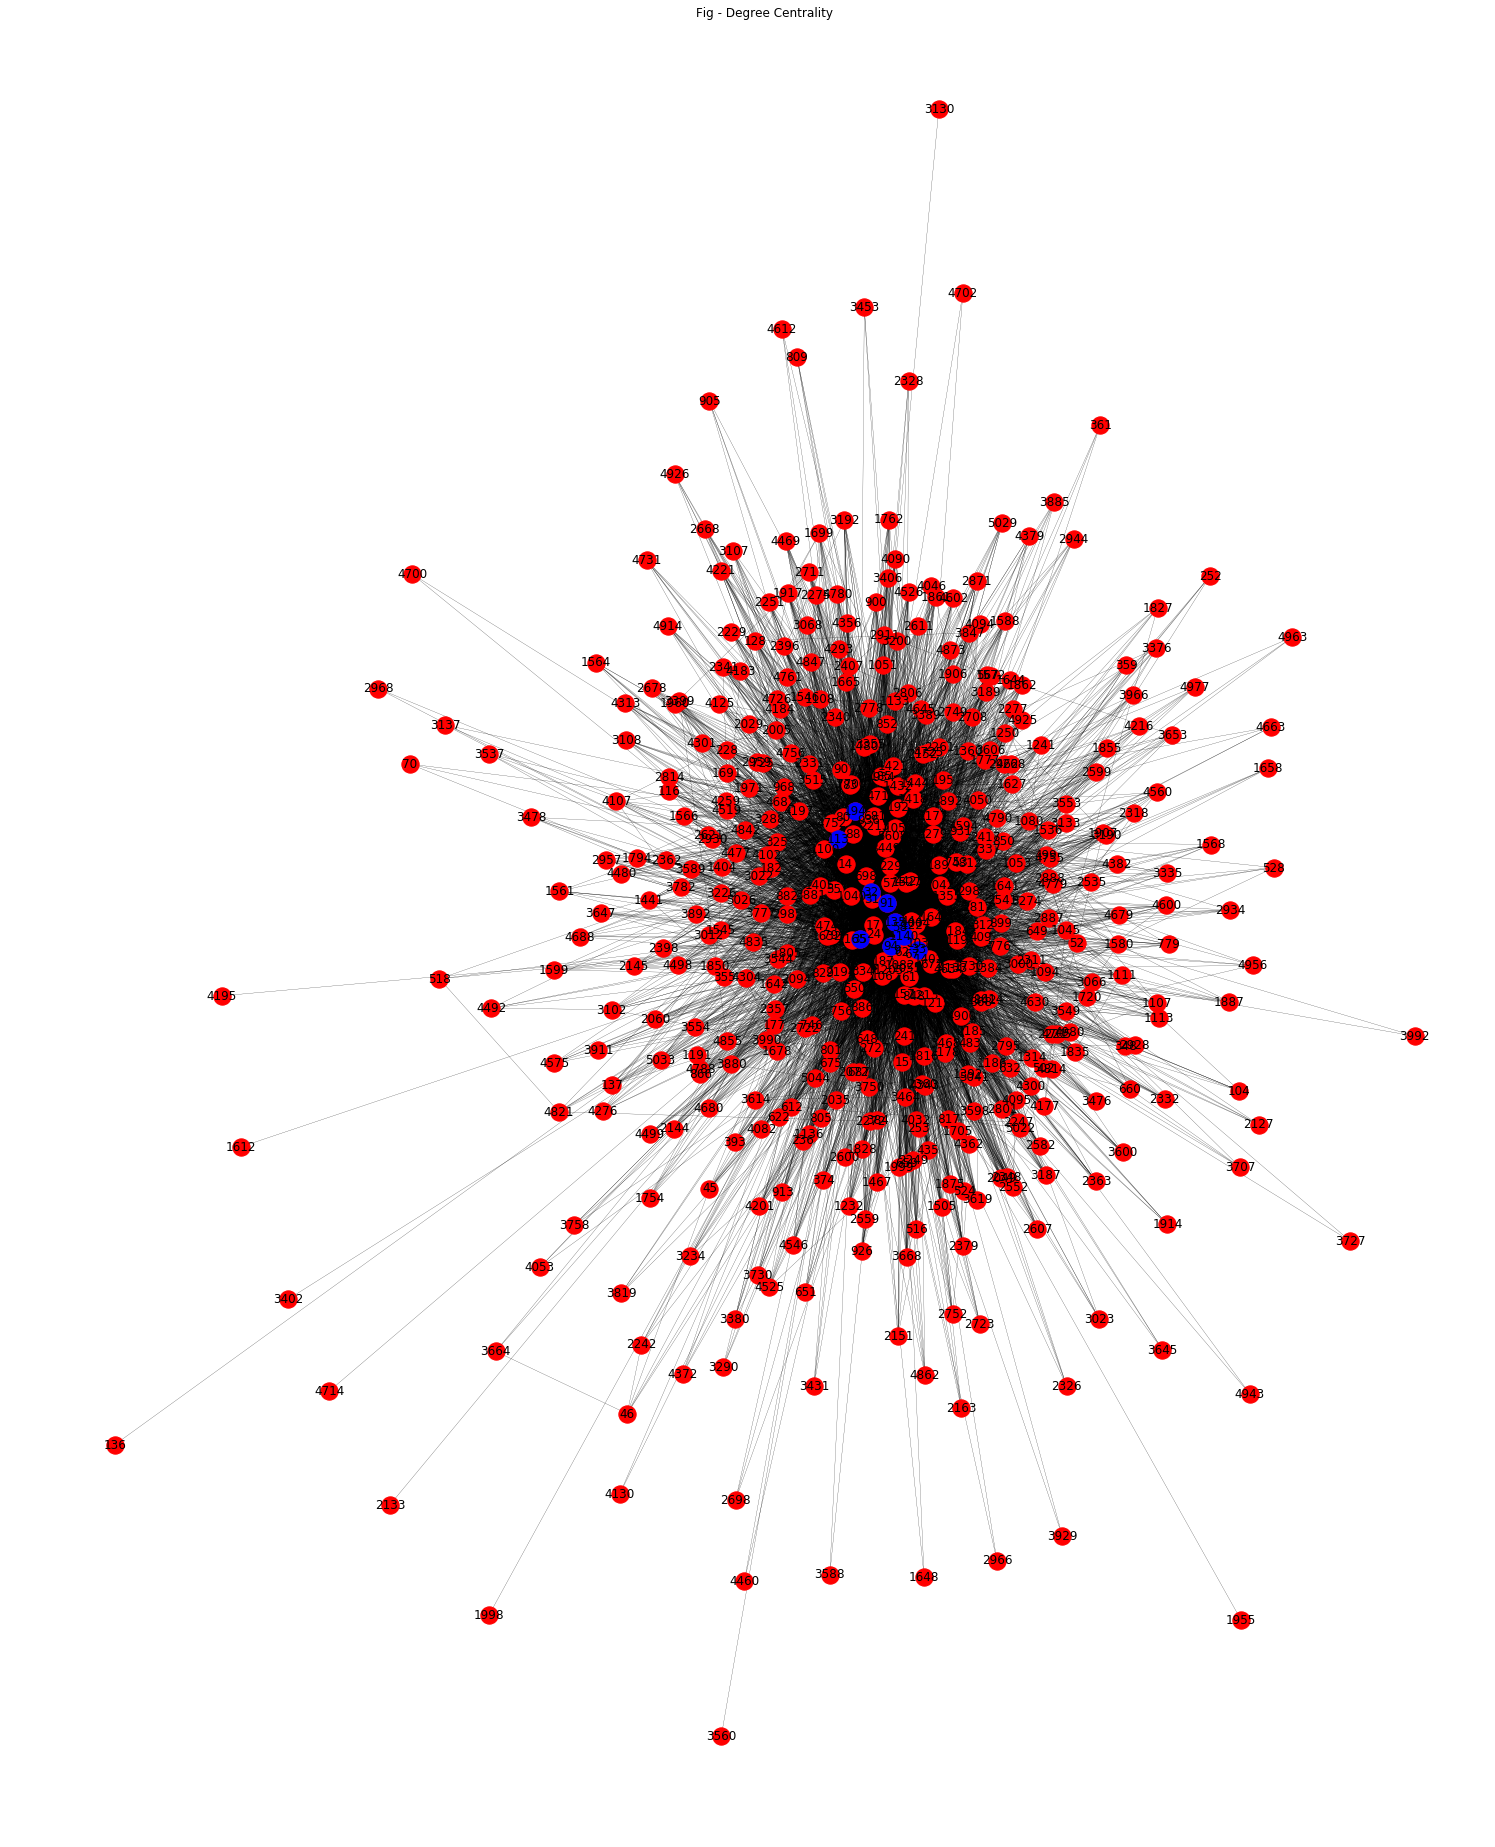

   Message pass through First Random Walk        
[35, 1042, 3190, 32, 936, 4812, 671, 3881, 8449, 1055, 1971, 62, 3515, 5608, 1405, 35, 4812, 936, 189, 182, 936, 2357, 1140, 550, 35, 4560, 33, 2559, 31, 5022, 1402, 1444, 1588, 57, 968, 35, 8449, 62, 852, 67, 8449, 3990, 79, 1107, 1082, 2817, 936, 4183, 135, 567, 135, 2817, 1213, 1113, 671, 1384, 2842, 483, 1828, 1082, 2752, 33, 312, 936, 848, 15, 1705, 35, 3537, 113, 3990, 698, 2599, 32, 4679, 698, 90, 649, 1082, 3782, 32, 4780, 88, 1474, 90, 934, 753, 4705, 94, 4790, 33, 2708, 122, 2842, 1080, 62, 3653, 35, 1564, 194, 1777, 7700, 3274, 229, 753, 1040, 1042, 14, 3279, 7700, 698, 2611, 14, 2727, 79, 1205, 14, 3990, 1082, 4752, 35, 1055, 1215, 926, 31, 2396, 80, 4835, 934, 3355, 106, 91, 1165, 4790, 1055, 3553, 61, 177, 24, 1875, 35, 3777, 83, 2229, 94, 177, 1140, 2778, 32, 2251, 83, 31, 850, 113, 4183, 113, 32, 3777, 194, 2814, 32, 1907, 35, 805, 4634, 1536, 1004, 1094, 194, 936, 106, 866, 671, 1045, 698, 1850, 35, 1914, 35, 2311, 4630

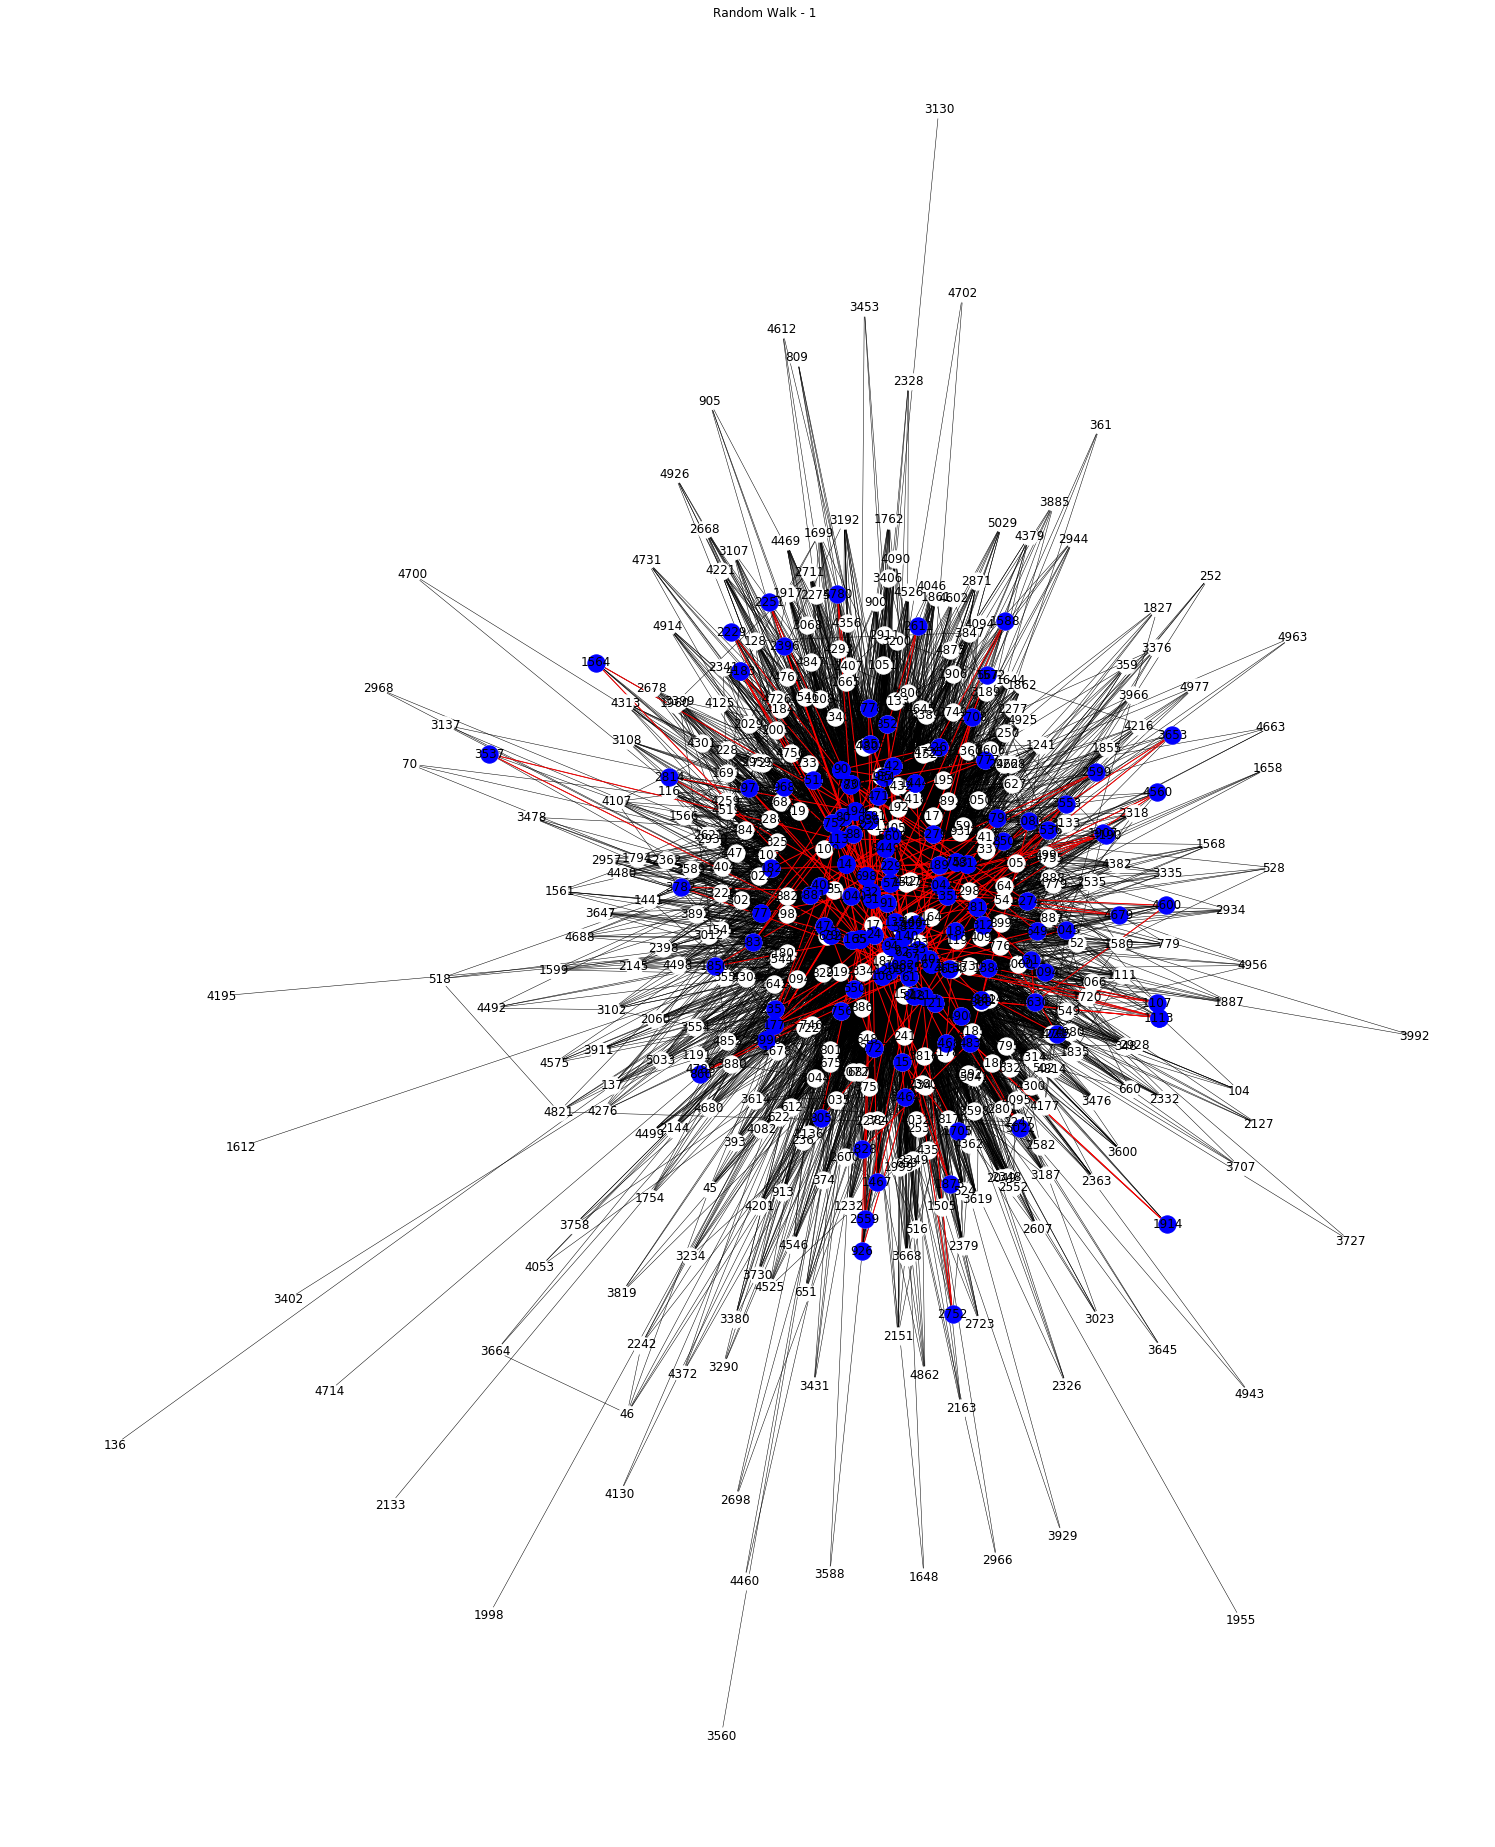

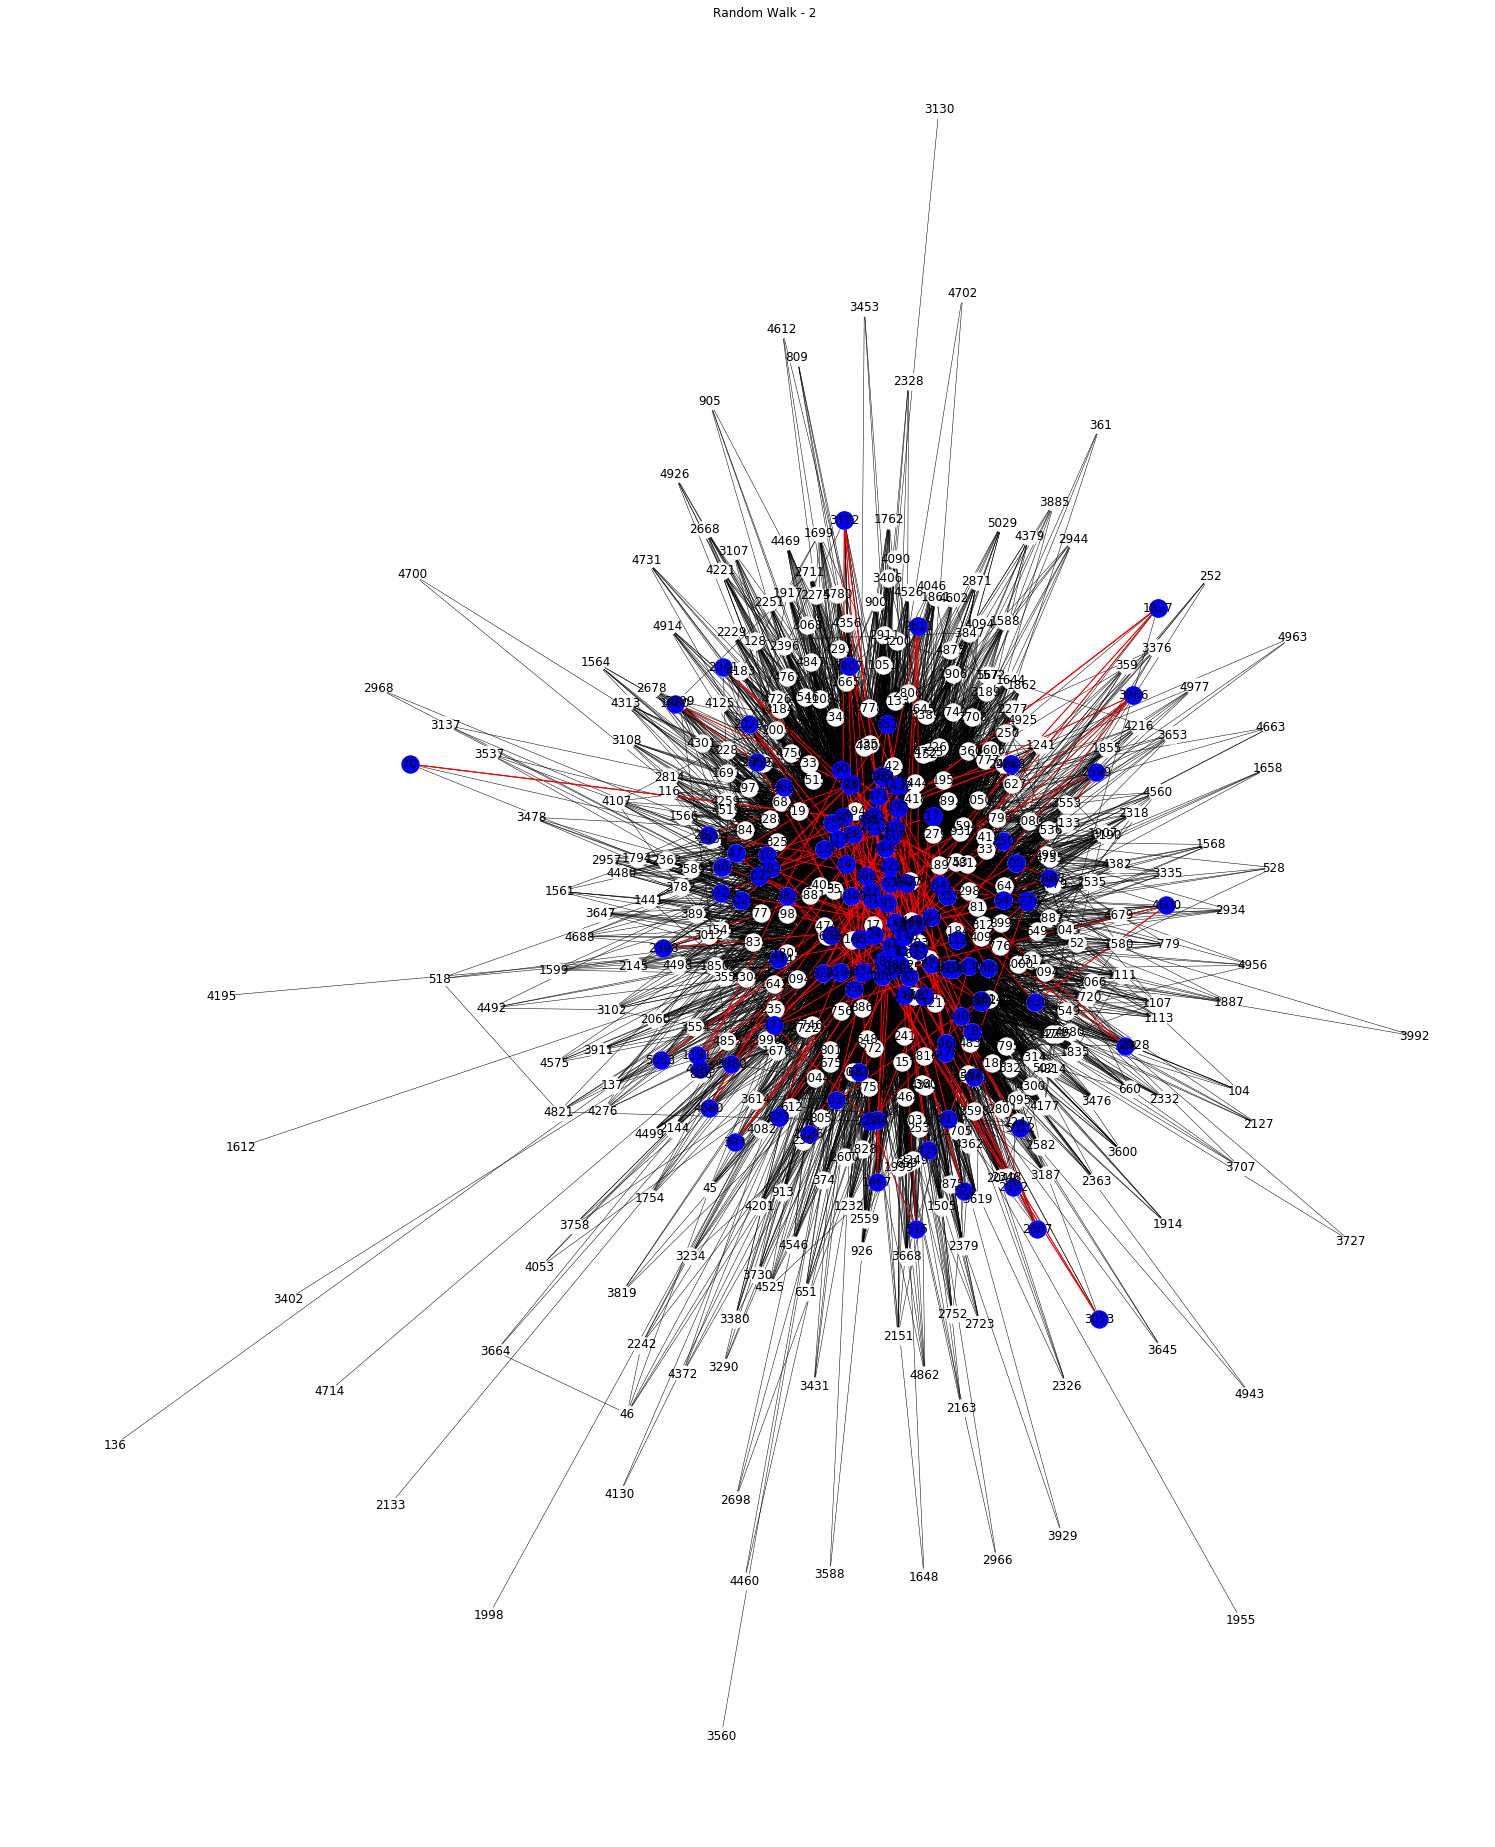

In [28]:
# coding=utf8
from __future__ import division
import networkx as nx
from DataLoader import dataloader
from random_walk import __randomwalk
from matplotlib import pyplot as plt
import copy
import numpy as np


def __edgeBetweennessCentrality(G):
    betweenness = dict.fromkeys(G, 0.0)
    betweenness.update(dict.fromkeys(G.edges(), 0.0))
    nodes = G
    for s in nodes:
        SList, Pred, dict_s = __shortestPath(G, s)
        betweenness = __store_edges(betweenness, SList, Pred, dict_s, s)
    
    for n in G: 
        del betweenness[n]
    betweenness = __normalized(betweenness, len(G),True)
    
    return betweenness


def __shortestPath(G, s):
    '''
          s => node from input
          G => input graph
          This function calculates the shortest path from a node to all other nodes in the graph
    '''
    SList = []
    Pred = {}                      # predecessors set in dictionary
    for v in G:
        Pred[v] = []
    dict_s = dict.fromkeys(G, 0.0) # default dictionary creation
    D = {}
    dict_s[s] = 1.0                # initialize the node value
    D[s] = 0
    Q = [s]
    while Q: 
        v = Q.pop(0)
        SList.append(v)
        Dv = D[v]
        sigmav = dict_s[v]
        for w in G[v]:
            if w not in D:
                Q.append(w)
                D[w] = Dv + 1
            if D[w] == Dv + 1: 
                dict_s[w] += sigmav
                Pred[w].append(v)  
    return SList, Pred, dict_s


def __store_edges(betweenness, S, P, sigma, s):
    
    '''
         This function collects the edges
          
    '''
    
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        const = (1 + delta[w]) / sigma[w]
        for v in P[w]:
            c = sigma[v] * const
            if (v, w) not in betweenness:
                betweenness[(w, v)] += c
            else:
                betweenness[(v, w)] += c
            delta[v] += c
        if w != s:
            betweenness[w] += delta[w]
    return betweenness


def __normalized(betweenness, n, normalized):
    
    '''
         This function normalizes the betweenness values.
    '''
    
    if n <= 1:
        factor = None
    else:
        factor = 1 / (n * (n - 1))
    if factor is not None:
        for v in betweenness:
            betweenness[v] *= factor
    return betweenness

def degree_centrality(G):
    return G.degree()

def degree_centrality_norm(G,normType=None):
    list_of_degree=list(G.degree())
    list_of_degree.sort(key=lambda x:x[1],reverse=True)
    max_degree=list_of_degree[0][1]
    no_of_nodes=len(list_of_degree)
    no_of_edges=G.number_of_edges()
    
    if normType=="mpd":
        if no_of_nodes>1:
            return [(x,y/(no_of_nodes-1)) for x,y in list_of_degree ]
        else:
            return list_of_degree
    elif normType=="md":
        return [(x,y/(max_degree)) for x,y in list_of_degree ]
    elif normType=="ds":
        return [(x,y/(2*no_of_edges)) for x,y in list_of_degree ]
    else:
        print("Default normalized degree centrality : maximum possible degree")
        if no_of_nodes>1:
            return [(x,y/(no_of_nodes-1)) for x,y in list_of_degree ]
        else:
            return list_of_degree


def __subSampling(G,no_nodes,degree_threshold):
    '''
         This function returns graph or subgraph components
    '''
    list_nodes_tobe_kept=[]
    list_tobe_checked=[]
    
    node_degrees=degree_centrality(G)  # This can be removed as we call it already. just pass the value.
    
    
    for i,j in node_degrees:
        if j>=degree_threshold:
            list_nodes_tobe_kept.append(i)
        else:
            list_tobe_checked.append(i)
            
    # This random list is for creating the reandom sample nodes degrees in random
    random_list=np.random.randint(low=5,high=degree_threshold+1,size=abs(no_nodes-len(list_nodes_tobe_kept)))
    
    
    cnt=len(list_nodes_tobe_kept)
    for degree in random_list:
        if cnt<=no_nodes:
            list_nodes_tobe_kept.append(list_tobe_checked[degree])
            cnt += 1
        else:
            break
    
    return list_nodes_tobe_kept


def __createGraph(G,sampleNodeList):
    nodeList=sampleNodeList
    listEdges=[]
    for node in nodeList:
        listEdges.extend([(node,x) for x in G.neighbors(node) if x in nodeList])
        
    s=set([ (x,y) if (x<=y) else (y,x) for x,y in listEdges])
    
    G1=nx.Graph()
    for x,y in s:
        G1.add_edge(x,y)
    
    return G1
        

def edge_degree_stats(G):
    '''  
          This function provides the frequency distribution of the nodes based on degrees.
    '''
    
    nodes_degree=degree_centrality(G)
    
    dict_states={}
    
    for x,y in nodes_degree:
        if y in dict_states:
            dict_states[y]=dict_states.get(y)+1
        else:
            dict_states[y]=1
            
    return dict_states


def edge_remove(G):
    d=__edgeBetweennessCentrality(G)
    lst_of_tuple=list(d.items())
    lst_of_tuple.sort(key=lambda x:x[1], reverse=True)
    return lst_of_tuple[0][0]


def girvan_newman(Gx):
    temp_graph=copy.deepcopy(Gx)
    c=list(nx.connected_component_subgraphs(temp_graph))
    l=len(c)
    cnt=0  # this is for number of iteration girvan-newman will iterate
    while (cnt<=15):
        temp_graph.remove_edge(*edge_remove(temp_graph))
        c=list(nx.connected_component_subgraphs(temp_graph))
        l=len(c)
        cnt=cnt+1
    return c

################################################  Main Program Execution ###########################################


if __name__=="__main__":  
    print("======================================================")
    print("                    Program output                    ")
    print("======================================================")

    ###########################
    #  Graph initialization
    ###########################
    
    d=dataloader()
    d.load_graph_data()
    G=d.get_graph()
    
    G=__createGraph(G,__subSampling(G,500,5000))
    #G=nx.karate_club_graph()
    
    

    ##############################################################
    # Degree centrality calculation along with normalization
    ##############################################################
    
    degree_centrality=list(degree_centrality(G))
    degree_centrality.sort(key=lambda x:x[1],reverse=True)

    print("===========================================")
    print("Top 10 users with highest degree centrality")
    print("===========================================")

    for i,j in degree_centrality[:][:10]:
        print("Node : {} and degree is : {}".format(i,j))

    print("======================================================")
    print("Top 10 users with highest Normalized degree centrality")
    print("======================================================")
    lst=degree_centrality_norm(G,"md")[0:10]
    for i,j in lst:
        print("Node : {} and normalized degree is : {}".format(i,j))

    ##################################################################
    # This section is for calculating Girvan-Newman community
    # detection
    ##################################################################

    c=girvan_newman(G)
    
    print("======================================================")
    print("Communities after applying Girvan-Newman")
    print("======================================================")
    for i in c:
        print(list(i))
    
    
    
    

    ##############################
    #   visualization part
    ##############################
    
    
    g1=G
    pos=nx.spring_layout(g1)
    lst_colours=range(3)

    plt.figure(figsize=(20,25))
    nx.draw(g1, pos, edge_color='k', node_color='w' ,with_labels=True, font_weight='light', width= 0.2)
    for i,node in enumerate(c):
        nsd=list(node.nodes())
        nx.draw_networkx_nodes(g1, pos, nodelist=nsd,node_color=[(i+1)*20 for i in range(len(node))])
    plt.title("Fig - Community")
    plt.savefig("community.png")
    plt.show()

    plt.figure(figsize=(20,25))
    nx.draw(g1, pos, edge_color='k',  with_labels=True, font_weight='light', width= 0.2)
    nsd=[x for x,_ in lst]
    nx.draw_networkx_nodes(g1, pos, nodelist=nsd, node_color="b")
    plt.title("Fig - Degree Centrality")
    plt.savefig("DegreeCentrality.png")
    plt.show()
    
    #####################################
    # Random Walk with 200 hops
    #####################################
    
    rnd = __randomwalk(G)
    highest_degree_node,_=lst[0]
    
    print("=================================================")
    print("   Message pass through First Random Walk        ")
    print("=================================================")
    first_random_walk=rnd.getRandomWlak(highest_degree_node,200)
    print(first_random_walk)
    edgelist_1=[]
    for i,node in enumerate(first_random_walk[:-1]):
        edgelist_1.append((node,first_random_walk[i+1]))
        
    print("=================================================")
    print("  Message pass through Second Random Walk        ")
    print("=================================================")
    second_random_walk=rnd.getRandomWlak(highest_degree_node,200)
    print(second_random_walk)
    edgelist_2=[]
    for i,node in enumerate(second_random_walk[:-1]):
        edgelist_2.append((node,second_random_walk[i+1]))
    print("===================End of Code===================")

    #################################
    #   visualization - Random Walk
    #################################
        
    plt.figure(figsize=(20,25))
    nx.draw(g1, pos, edge_color='k', node_color='w' ,with_labels=True, font_weight='light', width= 0.5)
    nx.draw_networkx_edges(g1, pos, edgelist=edgelist_1,edge_color="r")
    nx.draw_networkx_nodes(g1, pos, nodelist=first_random_walk,node_color="b")
    plt.title("Random Walk - 1")
    plt.savefig("RandomWalk1.png")
    plt.show()

    plt.figure(figsize=(20,25))
    nx.draw(g1, pos, edge_color='k', node_color='w' ,with_labels=True, font_weight='light', width= 0.5)
    nx.draw_networkx_edges(g1, pos, edgelist=edgelist_2,edge_color="r")
    nx.draw_networkx_nodes(g1, pos, nodelist=second_random_walk,node_color="b")
    plt.title("Random Walk - 2")
    plt.savefig("RandomWalk2.png")
    plt.show()